# Logistic Regression

#### Import libraries

In [1]:
import os
import numpy as np 
import pandas as pd 
import math
from sklearn.linear_model import LinearRegression, LogisticRegression, LogisticRegressionCV 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay
import statsmodels.api as sm 
import matplotlib.pyplot as plt 
import seaborn as sns 
from dmba import classificationSummary, gainsChart, liftChart 
from dmba.metric import AIC_score
import warnings

SEED = 1

### Example 1: Lecture

**Create a dataframe for the sample hours studies and pass data.**

<h4 style="color:blue"> Write Your Code Below: </h4>

In [2]:
# Example dataset: Predicting whether a student passes (1) or fails (0) based on hours studied
data = {
    'Hours_Studied': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Pass':          [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
}

df = pd.DataFrame(data)

df

,Hours_Studied,Pass
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
5,6,1
6,7,1
7,8,1
8,9,1
9,10,1


<h3 style="color:teal"> Expected Output: </h3>

,Hours_Studied,Pass
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
5,6,1
6,7,1
7,8,1
8,9,1
9,10,1


**Use statsmodels OLS to demonstrate useful Regression Summary Results and problems predicting a continuous output.**

💡Demonstrate warnings library usage to suppress certain warnings.

<h4 style="color:blue"> Write Your Code Below: </h4>

In [3]:
warnings.filterwarnings("ignore", category=UserWarning)

X = df[['Hours_Studied']]
X = sm.add_constant(X)
y = df['Pass']

lin_reg = sm.OLS(y, X).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Pass   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     25.00
Date:                Fri, 09 May 2025   Prob (F-statistic):            0.00105
Time:                        09:04:50   Log-Likelihood:               -0.17258
No. Observations:                  10   AIC:                             4.345
Df Residuals:                       8   BIC:                             4.950
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.3333      0.188     -1.773      0.114      -0.767       0.100
Hours_Studied     0.1515      0.030      5.000      0.001       0.082       0.221
==============================================================================
Omnibus:                        0.086   Durbin-Watson:                   1.491
Prob(Omnibus):                  0.958   Jarque-Bera (JB):                0.311
Skew:                           0.000   Prob(JB):                        0.856
Kurtosis:                       2.136   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<h3 style="color:teal"> Expected Output: </h3>

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Pass   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     25.00
Date:                Tue, 08 Apr 2025   Prob (F-statistic):            0.00105
Time:                        19:04:35   Log-Likelihood:               -0.17258
No. Observations:                  10   AIC:                             4.345
Df Residuals:                       8   BIC:                             4.950
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.3333      0.188     -1.773      0.114      -0.767       0.100
Hours_Studied     0.1515      0.030      5.000      0.001       0.082       0.221
==============================================================================
Omnibus:                        0.086   Durbin-Watson:                   1.491
Prob(Omnibus):                  0.958   Jarque-Bera (JB):                0.311
Skew:                           0.000   Prob(JB):                        0.856
Kurtosis:                       2.136   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Create a new dataframe with additional values for Hours_Studied = 0 and 11.**

<h4 style="color:blue"> Write Your Code Below: </h4>

In [4]:
new_data = {
    'Hours_Studied': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
    'Pass':          [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
}

df2 = pd.DataFrame(new_data)
df2

,Hours_Studied,Pass
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
5,5,0
6,6,1
7,7,1
8,8,1
9,9,1


<h3 style="color:teal"> Expected Output: </h3>

,Hours_Studied,Pass
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
5,5,0
6,6,1
7,7,1
8,8,1
9,9,1


**Use Linear Regression to demonstrate problems with predicting a linear outcome.**

<h4 style="color:blue"> Write Your Code Below: </h4>

In [5]:
X2 = df2[['Hours_Studied']]
X2 = sm.add_constant(X2)
df2_preds = df2.copy()
df2_preds['Linear_Pred'] = lin_reg.predict(X2)
df2_preds

,Hours_Studied,Pass,Linear_Pred
0,0,0,-0.333333
1,1,0,-0.181818
2,2,0,-0.030303
3,3,0,0.121212
4,4,0,0.272727
5,5,0,0.424242
6,6,1,0.575758
7,7,1,0.727273
8,8,1,0.878788
9,9,1,1.030303


<h3 style="color:teal"> Expected Output: </h3>

,Hours_Studied,Pass,Linear_Pred
0,0,0,-0.333333
1,1,0,-0.181818
2,2,0,-0.030303
3,3,0,0.121212
4,4,0,0.272727
5,5,0,0.424242
6,6,1,0.575758
7,7,1,0.727273
8,8,1,0.878788
9,9,1,1.030303


**Plot predictions.**

<h4 style="color:blue"> Write Your Code Below: </h4>

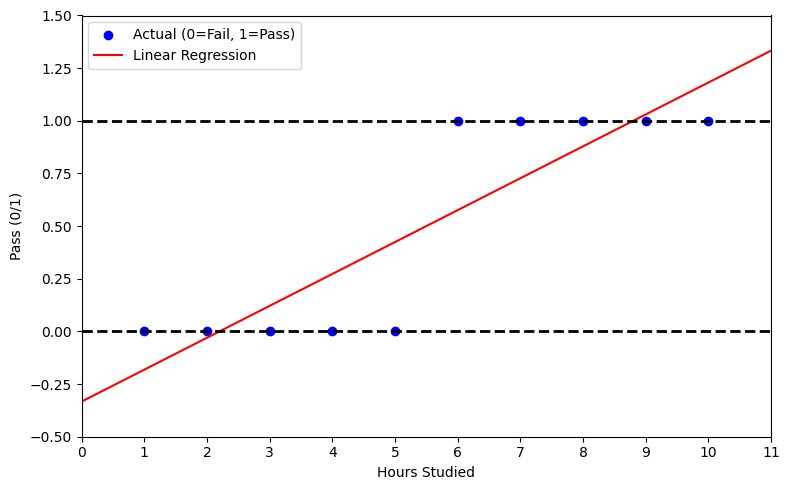

In [6]:
fig, ax = plt.subplots(figsize=(8,5))
#sns.scatterplot(data=df, x="Hours_Studied", y="Pass", s=75, a=ax)
ax.scatter(df['Hours_Studied'], df['Pass'], color='blue', label='Actual (0=Fail, 1=Pass)')
plt.plot(df2_preds['Linear_Pred'], color='red', linestyle='-', label='Linear Regression')
plt.xlabel('Hours Studied')
plt.ylabel('Pass (0/1)')
plt.axhline(y=0, color='black', linestyle='--', linewidth=2)
plt.axhline(y=1, color='black', linestyle='--', linewidth=2)
plt.xlim(0, 11)
plt.ylim(-0.5, 1.5)
ax.set_xticks(df2_preds['Hours_Studied'].values)
plt.legend()
plt.tight_layout()
plt.show()

<h3 style="color:teal"> Expected Output: </h3>

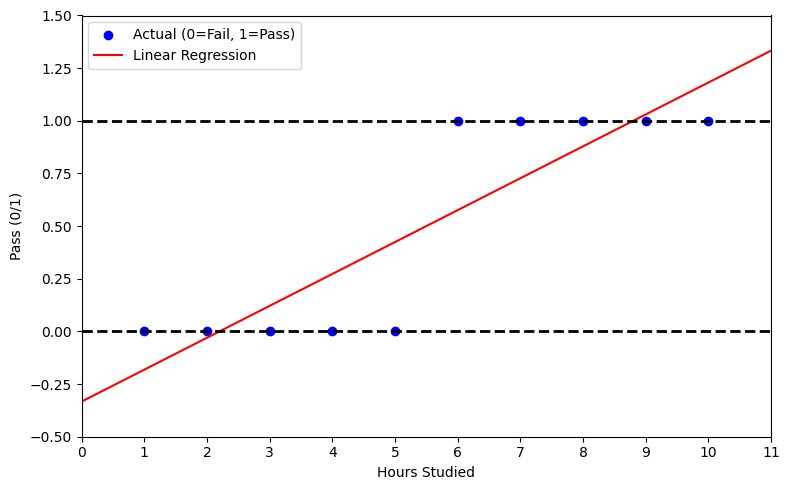

### Example 2: Lecture

**Create a dataframe for the `UniversalBank.csv` data**

- Drop the `ID` and `Zip_Code` columns
- Convert the Education column as a category and rename the categories as: _1: 'Undergrad', 2: 'Graduate', 3: 'Advanced/Professional'_
- Create dummy variables for the `Education` column

<h4 style="color:blue"> Write Your Code Below: </h4>

In [7]:
bank_df = pd.read_csv(os.path.join('..', 'data', 'UniversalBank.csv'))
bank_df.drop(columns=['ID', 'ZIP Code'], inplace=True)
bank_df.columns = [c.replace(' ','_') for c in bank_df.columns]
bank_df['Education'] = bank_df['Education'].astype('category')
new_categories = {1: 'Undergrad', 2: 'Graduate', 3: 'Advanced/Professional'}
bank_df['Education'] = bank_df['Education'].cat.rename_categories(new_categories)
bank_df = pd.get_dummies(bank_df, prefix_sep='_', drop_first=True, dtype=int)
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              5000 non-null   int64  
 1   Experience                       5000 non-null   int64  
 2   Income                           5000 non-null   int64  
 3   Family                           5000 non-null   int64  
 4   CCAvg                            5000 non-null   float64
 5   Mortgage                         5000 non-null   int64  
 6   Personal_Loan                    5000 non-null   int64  
 7   Securities_Account               5000 non-null   int64  
 8   CD_Account                       5000 non-null   int64  
 9   Online                           5000 non-null   int64  
 10  CreditCard                       5000 non-null   int64  
 11  Education_Graduate               5000 non-null   int32  
 12  Education_Advanced/P

<h3 style="color:teal"> Expected Output: </h3>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              5000 non-null   int64  
 1   Experience                       5000 non-null   int64  
 2   Income                           5000 non-null   int64  
 3   Family                           5000 non-null   int64  
 4   CCAvg                            5000 non-null   float64
 5   Mortgage                         5000 non-null   int64  
 6   Personal_Loan                    5000 non-null   int64  
 7   Securities_Account               5000 non-null   int64  
 8   CD_Account                       5000 non-null   int64  
 9   Online                           5000 non-null   int64  
 10  CreditCard                       5000 non-null   int64  
 11  Education_Graduate               5000 non-null   int32  
 12  Education_Advanced/P

**Split dataset into training and validation sets.**

Use a 40% validation split.

<h4 style="color:blue"> Write Your Code Below: </h4>

In [8]:
X = bank_df.drop(columns=['Personal_Loan'])
y = bank_df['Personal_Loan']

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size = 0.4, 
                                                      random_state = SEED)

print('Training Set:', train_X.shape, 'Validation Set:', valid_X.shape)

Training Set: (3000, 12) Validation Set: (2000, 12)


<h3 style="color:teal"> Expected Output: </h3>

Training Set: (3000, 12) Validation Set: (2000, 12)


**Create a Logistic Regression Model using `statsmodels`.**

- Use the single continuous variable `Income` for X and `Personal_Loan` for y. 
- Be sure to add a constant to X.

<h4 style="color:blue"> Write Your Code Below: </h4>

In [9]:
train_X2 = sm.add_constant(train_X['Income'])
logit_reg = sm.Logit(train_y, train_X2).fit()

logit_reg.summary()

Optimization terminated successfully.
         Current function value: 0.201620
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal_Loan   No. Observations:                 3000
Model:                          Logit   Df Residuals:                     2998
Method:                           MLE   Df Model:                            1
Date:                Fri, 09 May 2025   Pseudo R-squ.:                  0.3609
Time:                        09:05:38   Log-Likelihood:                -604.86
converged:                       True   LL-Null:                       -946.37
Covariance Type:            nonrobust   LLR p-value:                1.474e-150
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.0627      0.237    -25.622      0.000      -6.526      -5.599
Income         0.0364      0.002     20.885      0.000       0.033       0.040
==============================================================================
"""

<h3 style="color:teal"> Expected Output: </h3>

Optimization terminated successfully.
         Current function value: 0.201620
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal_Loan   No. Observations:                 3000
Model:                          Logit   Df Residuals:                     2998
Method:                           MLE   Df Model:                            1
Date:                Tue, 08 Apr 2025   Pseudo R-squ.:                  0.3609
Time:                        19:04:36   Log-Likelihood:                -604.86
converged:                       True   LL-Null:                       -946.37
Covariance Type:            nonrobust   LLR p-value:                1.474e-150
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.0627      0.237    -25.622      0.000      -6.526      -5.599
Income         0.0364      0.002     20.885      0.000       0.033       0.040
==============================================================================
"""

**Create a Logistic Regression Model using `statsmodels` using all variables.**

- Be sure to add a constant to X

<h4 style="color:blue"> Write Your Code Below: </h4>

In [10]:
train_X3 = sm.add_constant(train_X)
logit_reg2 = sm.Logit(train_y, train_X3).fit()

logit_reg2.summary()

Optimization terminated successfully.
         Current function value: 0.113383
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal_Loan   No. Observations:                 3000
Model:                          Logit   Df Residuals:                     2987
Method:                           MLE   Df Model:                           12
Date:                Fri, 09 May 2025   Pseudo R-squ.:                  0.6406
Time:                        09:05:44   Log-Likelihood:                -340.15
converged:                       True   LL-Null:                       -946.37
Covariance Type:            nonrobust   LLR p-value:                3.627e-252
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                             -12.5634      2.336     -5.377      0.000     -17.143      -7.984
Age                                -0.0354      0.086     -0.412      0.680      -0.204       0.133
Experience                          0.0369      0.086      0.431      0.666      -0.131       0.205
Income                              0.0589      0.004     15.044      0.000       0.051       0.067
Family                              0.6128      0.103      5.931      0.000       0.410       0.815
CCAvg                               0.2408      0.060      4.032      0.000       0.124       0.358
Mortgage                            0.0010      0.001      1.301      0.193      -0.001       0.003
Securities_Account                 -1.0305      0.422     -2.443      0.015      -1.857      -0.204
CD_Account                          3.6628      0.460      7.961      0.000       2.761       4.565
Online                             -0.6794      0.216     -3.140      0.002      -1.103      -0.255
CreditCard                         -0.9609      0.274     -3.507      0.000      -1.498      -0.424
Education_Graduate                  4.2075      0.364     11.573      0.000       3.495       4.920
Education_Advanced/Professional     4.3580      0.365     11.937      0.000       3.642       5.074
===================================================================================================

Possibly complete quasi-separation: A fraction 0.12 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

<h3 style="color:teal"> Expected Output: </h3>

Optimization terminated successfully.
         Current function value: 0.113383
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal_Loan   No. Observations:                 3000
Model:                          Logit   Df Residuals:                     2987
Method:                           MLE   Df Model:                           12
Date:                Tue, 08 Apr 2025   Pseudo R-squ.:                  0.6406
Time:                        19:04:36   Log-Likelihood:                -340.15
converged:                       True   LL-Null:                       -946.37
Covariance Type:            nonrobust   LLR p-value:                3.627e-252
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                             -12.5634      2.336     -5.377      0.000     -17.143      -7.984
Age                                -0.0354      0.086     -0.412      0.680      -0.204       0.133
Experience                          0.0369      0.086      0.431      0.666      -0.131       0.205
Income                              0.0589      0.004     15.044      0.000       0.051       0.067
Family                              0.6128      0.103      5.931      0.000       0.410       0.815
CCAvg                               0.2408      0.060      4.032      0.000       0.124       0.358
Mortgage                            0.0010      0.001      1.301      0.193      -0.001       0.003
Securities_Account                 -1.0305      0.422     -2.443      0.015      -1.857      -0.204
CD_Account                          3.6628      0.460      7.961      0.000       2.761       4.565
Online                             -0.6794      0.216     -3.140      0.002      -1.103      -0.255
CreditCard                         -0.9609      0.274     -3.507      0.000      -1.498      -0.424
Education_Graduate                  4.2075      0.364     11.573      0.000       3.495       4.920
Education_Advanced/Professional     4.3580      0.365     11.937      0.000       3.642       5.074
===================================================================================================

Possibly complete quasi-separation: A fraction 0.12 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

**Create a Logistic Regression Model using `sklearn`.**

Experiment with the `penalty`, `C`, and `solver` parameters and compare to the `statsmodels` summary:

- `None`: no penalty is added
- `l2`: add a L2 penalty term and it is the default choice
- `l1`: add a L1 penalty term
- `elasticnet`: both L1 and L2 penalty terms are added.

Review the [sklearn Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) for options for `solver` and `penalty` as well as the `C` regularization strength. Also take note of the Attributes that are returned in the model object.

<h4 style="color:blue"> Write Your Code Below: </h4>

In [11]:
# penalty = "l2", C = 1e42, solver = 'liblinear'
logit_reg_sk = LogisticRegression(penalty="l2", 
                                  C=1e42, 
                                  solver='liblinear').fit(train_X, train_y)
print('Intercept: ', logit_reg_sk.intercept_[ 0]) 
pd.DataFrame({'coeff': logit_reg_sk.coef_[0]}, index=train_X.columns)

Intercept:  -12.560703103343736


,coeff
Age,-0.035686
Experience,0.037234
Income,0.058921
Family,0.612680
CCAvg,0.240926
Mortgage,0.001015
Securities_Account,-1.029088
CD_Account,3.662056
Online,-0.679537
CreditCard,-0.960725


<h3 style="color:teal"> Expected Output: </h3>

Intercept:  -12.560703103343736


,coeff
Age,-0.035686
Experience,0.037234
Income,0.058921
Family,0.612680
CCAvg,0.240926
Mortgage,0.001015
Securities_Account,-1.029088
CD_Account,3.662056
Online,-0.679537
CreditCard,-0.960725


**Calculate probability for Income = `140` using the first `statsmodels` model.**

<h4 style="color:blue"> Write Your Code Below: </h4>

In [12]:
x = 140
log_odds = logit_reg.params['const'] + logit_reg.params['Income'] * x
p = 1 / (1 + np.exp(-log_odds))
print(f'Probability of Income = ${x},000 is {p:.2%}')

Probability of Income = $140,000 is 27.66%


<h3 style="color:teal"> Expected Output: </h3>

Probability of Income = $140,000 is 27.66%


**Make probability predictions for all customers in the training data using the single Income model.**

Be sure to use the training data that you added the constant.

Select the first 5 customers that made 140K to confirm our earlier manual calculations.

<h4 style="color:blue"> Write Your Code Below: </h4>

In [13]:
train_preds = train_X2.copy()
train_preds['Prob'] = logit_reg.predict(train_X2)
train_preds[train_preds['Income'] == 140].head()

,const,Income,Prob
3193,1.0,140,0.276628
2776,1.0,140,0.276628
1696,1.0,140,0.276628
1931,1.0,140,0.276628
4354,1.0,140,0.276628


<h3 style="color:teal"> Expected Output: </h3>

,const,Income,Prob
3193,1.0,140,0.276628
2776,1.0,140,0.276628
1696,1.0,140,0.276628
1931,1.0,140,0.276628
4354,1.0,140,0.276628


**Plot the probabilities for all customers in the training data.**

Be sure to use the training data that you added the constant.

<h4 style="color:blue"> Write Your Code Below: </h4>

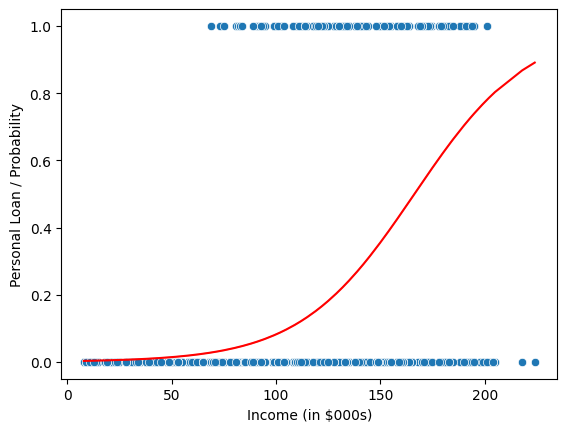

In [14]:
sns.scatterplot(x=train_preds['Income'], y=train_y)
sns.lineplot(x=train_preds['Income'], y=train_preds['Prob'], 
             color='red', linestyle='-')
plt.xlabel('Income (in $000s)')
plt.ylabel('Personal Loan / Probability')
plt.show()

<h3 style="color:teal"> Expected Output: </h3>

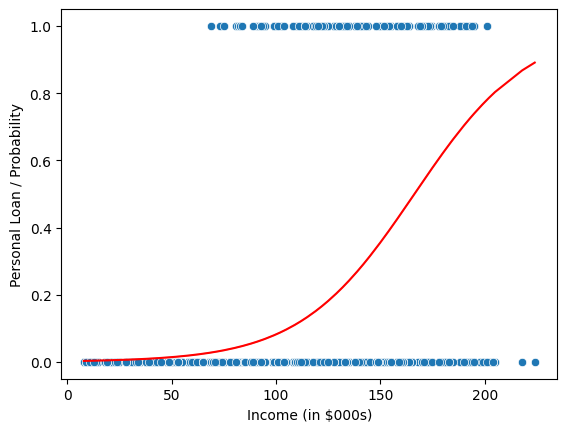

**Make probability predictions for all customers in the training data using the full model.**

Be sure to use the training data that you added the constant.

Select the first 5 customers and compare the simple model.

<h4 style="color:blue"> Write Your Code Below: </h4>

In [15]:
train_preds2 = train_X3.copy()
train_preds2['Prob'] = logit_reg2.predict(train_X3)
train_preds2[train_preds2['Income'] == 140].head()

,const,Age,Experience,Income,Family,CCAvg,Mortgage,Securities_Account,CD_Account,Online,CreditCard,Education_Graduate,Education_Advanced/Professional,Prob
3193,1.0,31,7,140,1,4.0,0,0,0,0,1,0,0,0.010557
2776,1.0,46,20,140,2,6.3,380,0,0,1,1,0,0,0.023697
1696,1.0,45,21,140,2,7.6,132,0,0,0,0,0,0,0.125178
1931,1.0,28,2,140,2,2.0,0,0,0,1,0,0,0,0.014684
4354,1.0,40,16,140,3,5.6,0,0,0,0,0,0,0,0.124046


<h3 style="color:teal"> Expected Output: </h3>

,const,Age,Experience,Income,Family,CCAvg,Mortgage,Securities_Account,CD_Account,Online,CreditCard,Education_Graduate,Education_Advanced/Professional,Prob
3193,1.0,31,7,140,1,4.0,0,0,0,0,1,0,0,0.010557
2776,1.0,46,20,140,2,6.3,380,0,0,1,1,0,0,0.023697
1696,1.0,45,21,140,2,7.6,132,0,0,0,0,0,0,0.125178
1931,1.0,28,2,140,2,2.0,0,0,0,1,0,0,0,0.014684
4354,1.0,40,16,140,3,5.6,0,0,0,0,0,0,0,0.124046


**Display evaluation metrics and confusion matrix for training data and validation data using the full model.**

<h4 style="color:blue"> Write Your Code Below: </h4>

In [16]:
def plot_confusion_matrix(clf, X, y, ax, title):
    ConfusionMatrixDisplay.from_estimator(clf, X, y, cmap=plt.cm.Blues, colorbar=False, ax=ax)
    plt.title(title)
    plt.tight_layout()

In [17]:
print('Training Data Metrics:')
y_pred = logit_reg_sk.predict(train_X)
print(f'Accuracy: {accuracy_score(train_y, y_pred):.2%}')
print(f'Precision: {precision_score(train_y, y_pred):.2%}')
print(f'Recall: {recall_score(train_y, y_pred):.2%}')

Training Data Metrics:
Accuracy: 96.00%
Precision: 86.78%
Recall: 68.64%


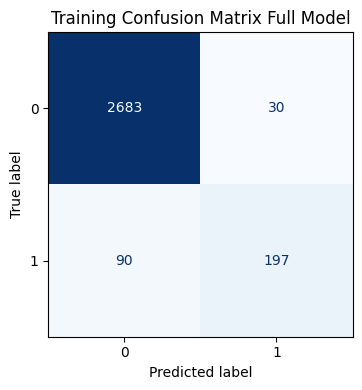

In [18]:
fig, ax = plt.subplots(figsize=(4, 4))
plot_confusion_matrix(logit_reg_sk, train_X, train_y, 
                      ax, 'Training Confusion Matrix Full Model')

In [19]:
print('Validation Data Metrics:')
y_pred = logit_reg_sk.predict(valid_X)
print(f'Accuracy: {accuracy_score(valid_y, y_pred):.2%}')
print(f'Precision: {precision_score(valid_y, y_pred):.2%}')
print(f'Recall: {recall_score(valid_y, y_pred):.2%}')

Validation Data Metrics:
Accuracy: 96.00%
Precision: 88.97%
Recall: 66.84%


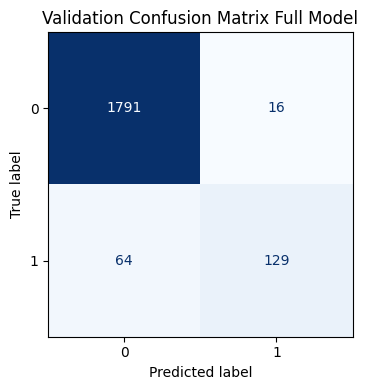

In [20]:
fig, ax = plt.subplots(figsize=(4, 4))
plot_confusion_matrix(logit_reg_sk, valid_X, valid_y, 
                      ax, 'Validation Confusion Matrix Full Model')

<h3 style="color:teal"> Expected Output: </h3>

Training Data Metrics:
Accuracy: 96.00%
Precision: 86.78%
Recall: 68.64%


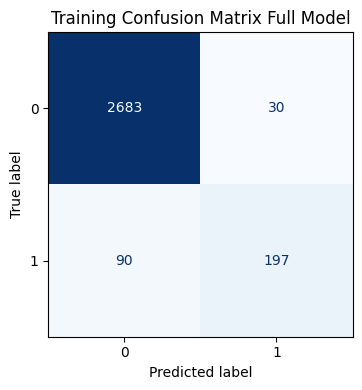

Validation Data Metrics:
Accuracy: 96.00%
Precision: 88.97%
Recall: 66.84%


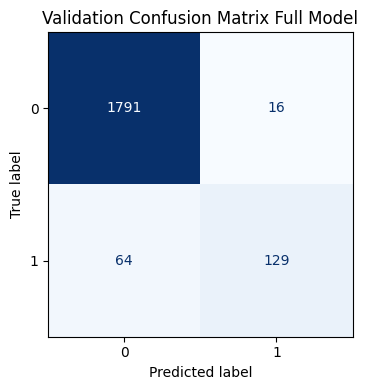

# Problem 10.1 Financial Condition of Banks.

The file _Banks.csv_ includes data on a sample of 20 banks. The "Financial Condition" column records the judgement of an expert on the financial condition of each bank. This outcome variable takes one of two possible values -- _weak_ or _strong_-- according to the financial condition of the bank. The predictors are two ratios used in the financial analysis of banks: TotLns&Lses/Assets is the ratio of total loans and leases to total assets and TotExp/Assets is the ratio of total expenses to total assets. The target is to use the two ratios for classifying the financial condition of a new bank.

Run a logistic regression model (on the entire dataset) that model the status of a bank as a function of the two financial measures provided. Specify the _success_ class as _weak_ (this is similar to creating a dummy that is 1 for financially weak banks and 0 otherwise), and use the default cutoff value of 0.5.

**Create a dataframe for the `banks.csv` data**

Replace `' '` and `/` with `_` and `&` with `''` and drop the `Obs` and `TotCap_Assets` columns.

<h4 style="color:blue"> Write Your Code Below: </h4>

In [21]:
# load the data
bank2_df = pd.read_csv(os.path.join('..', 'data', 'banks.csv'))

# pretify the variable names
bank2_df.columns = [c.replace(' ', '_') for c in bank2_df.columns]
bank2_df.columns = [c.replace('&', '') for c in bank2_df.columns]
bank2_df.columns = [c.replace('/', '_') for c in bank2_df.columns]

# drop unwanted variables
bank2_df.drop(columns = ['Obs','TotCap_Assets'], inplace = True)

# cheack few records
bank2_df.head()

,Financial_Condition,TotExp_Assets,TotLnsLses_Assets
0,1,0.12,0.65
1,1,0.11,0.62
2,1,0.09,1.02
3,1,0.10,0.67
4,1,0.11,0.69


<h3 style="color:teal"> Expected Output: </h3>

,Financial_Condition,TotExp_Assets,TotLnsLses_Assets
0,1,0.12,0.65
1,1,0.11,0.62
2,1,0.09,1.02
3,1,0.10,0.67
4,1,0.11,0.69


**Fit a logistic regression (set penalty=l2 and C=1e42 to avoid regularization**

<h4 style="color:blue"> Write Your Code Below: </h4>

In [22]:
# fit a logistic regression (set penalty=l2 and C=1e42 to avoid regularization)
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
y = bank2_df['Financial_Condition']
X = bank2_df.drop(columns=['Financial_Condition'])
logit_reg.fit(X, y)

LogisticRegression(C=1e+42, solver='liblinear')

<h3 style="color:teal"> Expected Output: </h3>

LogisticRegression(C=1e+42, solver='liblinear')

**Print coefficients and AIC measures**

<h4 style="color:blue"> Write Your Code Below: </h4>

In [23]:
# print coefficients and AIC measures
print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns).transpose())
print('AIC', AIC_score(y, logit_reg.predict(X), df = len(X.columns) + 1))

intercept  -14.720832806179057
       TotExp_Assets  TotLnsLses_Assets
coeff      89.832567           8.371267
AIC 18.705839468305996


<h3 style="color:teal"> Expected Output: </h3>

intercept  -14.720832806179057
       TotExp_Assets  TotLnsLses_Assets
coeff      89.832567           8.371267
AIC 18.705839468305996


#### 10.1.b.

Consider a new bank whose total loans and leases/assets ratio = 0.6 and total expenses/assets ratio = 0.11. From your logistic regression model, estimate the following four quantities for this bank (use Python to do all the intermediate calculations; show your final answers to four decimal places): the logit, the odds, the probability of being financially weak, and the classification of the bank (use cutoff = 0.5).

<h4 style="color:blue"> Write Your Code Below: </h4>

In [24]:
# new record
new_bank = pd.DataFrame(
    [[0.11, 0.6]],
    columns=['TotExp_Assets', 'TotLns_Lses_Assets'])
new_bank

,TotExp_Assets,TotLns_Lses_Assets
0,0.11,0.6


<h3 style="color:teal"> Expected Output: </h3>

,TotExp_Assets,TotLns_Lses_Assets
0,0.11,0.6


**Calculate logit, odds and probability of being financially weak**

<h4 style="color:blue"> Write Your Code Below: </h4>

In [25]:
# calculate logit, odds and probability of being financially weak
logit_new = logit_reg.intercept_[0] + (logit_reg.coef_[0][0] * new_bank['TotExp_Assets'].iloc[0]) + (logit_reg.coef_[0][1] * new_bank['TotLns_Lses_Assets'].iloc[0]) #8.3713
print("logit = ", logit_new)
odds = math.exp(logit_new)
print("odds = ", odds)
prob = odds/(1+odds)
print("prob = ", prob)

logit =  0.18350982427661844
odds =  1.2014267685026243
prob =  0.5457491412806867


<h3 style="color:teal"> Expected Output: </h3>

logit =  0.18350982427661844
odds =  1.2014267685026243
prob =  0.5457491412806867
